In [1]:
import os
os.chdir(r'E:\Courses\Data Science Journey\Classification and Regression\Use Case 1')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
X = df.iloc[:,2:4].values

In [10]:
y = df.iloc[:,-1].values

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [16]:
len(X_test)

120

In [19]:
mylist = list(range(0,50))
neighbor = list(filter(lambda x : x %2 != 0, mylist))
neighbor

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [20]:
cv_scores = []
for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.8464285714285715, 0.8785714285714284, 0.9071428571428571, 0.9071428571428569, 0.9107142857142856, 0.8999999999999998, 0.9035714285714285, 0.8999999999999998, 0.8964285714285714, 0.8928571428571429, 0.8928571428571429, 0.8892857142857142, 0.8928571428571429, 0.8964285714285716, 0.9, 0.8964285714285716, 0.8964285714285716, 0.9, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0.8857142857142858, 0.875, 0.875]


In [21]:
len(neighbor)

25

In [22]:
len(cv_scores)

25

In [23]:
MSE = [1-x for x in cv_scores]
optimal_k = neighbor[MSE.index(min(MSE))]

In [24]:
optimal_k

9

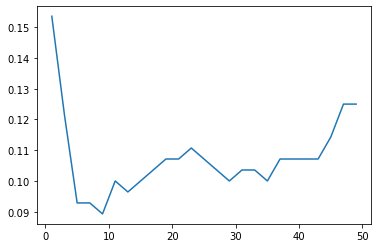

In [25]:
import matplotlib.pyplot as plt
plt.plot(neighbor,MSE)

In [28]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train,y_train)
y_pred = knn_optimal.predict(X_test) 
acc = accuracy_score(y_test,y_pred)
acc

0.9083333333333333

In [30]:
from  sklearn.metrics  import confusion_matrix
confusion_matrix(y_test,y_pred)
#90.8%

array([[72,  7],
       [ 4, 37]], dtype=int64)

In [31]:
#https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo

In [40]:
var_smooth = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
from sklearn.naive_bayes import GaussianNB
cv_scores = []
for vs in var_smooth:
    nbg = GaussianNB(var_smoothing=vs)
    scores = cross_val_score(nbg,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.8678571428571429, 0.8428571428571429, 0.8357142857142856, 0.825, 0.8178571428571428, 0.8107142857142857, 0.7964285714285714, 0.7964285714285714, 0.7892857142857141, 0.7857142857142857]


In [41]:
MSE = [1-x for x in cv_scores]
optimal_vs = var_smooth[MSE.index(min(MSE))]

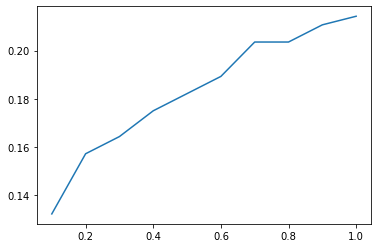

In [42]:
import matplotlib.pyplot as plt
plt.plot(var_smooth,MSE)

In [43]:
nbg_optimal = GaussianNB(var_smoothing=optimal_vs)
nbg_optimal.fit(X_train,y_train)
y_pred = nbg_optimal.predict(X_test) 
acc = accuracy_score(y_test,y_pred)
acc

0.8833333333333333

In [44]:
optimal_vs

0.1

In [46]:
from  sklearn.metrics  import confusion_matrix
confusion_matrix(y_test,y_pred)
#88.3

array([[76,  3],
       [11, 30]], dtype=int64)